



# Energy Consumption Data Notebook 2: Data Analysis on the Cleaned Dataset


---

### Goals For This Notebook:

1 - Import our merged weather and power dataset.<br>

2 - Use the operation **GroupBy** to group data by time and month.<br>

3 - Create bar plots to examine which months uses the most energy and why.<br>

---

### Table of Contents

1 - [Import Data](#section1)<br>

2 - [GroupBy](#section2)<br>

3 - [Data Visualization - Which Months Uses the Most Energy?](#section3)<br>

---

In this notebook, we will work with our merged weather and power dataset from Energy Consumption Data Notebook 1. We will group data by using an operation called GroupBy to categorize data by time and month. Finally, we will create our first data visualizations, so we can see during which months most energy was consumed and try to find out why.

Let's first get started by importing the libraries we need:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Import Data <a id='section1'></a>

Let's import the data from last notebook - recall that we saved it in the file `weather_and_power.csv` in the *data* folder.

In [4]:
# EXERCISE

#Import it below!
weather_and_power = pd.read_csv("data/weather_and_power.csv")
weather_and_power.head()

,Unnamed: 0,Timestamp,outdoor air temperature (F),humidity,windspeed,cloudcover,solar irradiance on PV panels (Watt per m^2),building total power consumption (Watts),freezer power consumption (Watts),refrigerator power consumption (Watts),refrigerator fan power consumption (Watts),west air conditioning power consumption (Watts),east air conditioning power consumption (Watts),total power consumption (Watts),Better Timestamp,date,time,month,12-hr-time
0,0,2021-01-01 00:00:00,43.56,98.0,2.87,0.37,0.0,32533.332031,4083.540039,11.914492,43.354057,304.049896,944.930481,37921.120996,2021-01-01 00:00:00,2021-01-01,00:00:00,1,12:00am
1,1,2021-01-01 00:15:00,43.41,98.0,2.93,0.38,0.0,30975.056641,3969.495605,14.195988,43.110699,304.558319,958.440125,36264.857376,2021-01-01 00:15:00,2021-01-01,00:15:00,1,12:15am
2,2,2021-01-01 00:30:00,43.28,98.0,2.98,0.41,0.0,31915.005859,3835.891602,12.848112,253.175949,304.966461,1015.086365,37336.974348,2021-01-01 00:30:00,2021-01-01,00:30:00,1,12:30am
3,3,2021-01-01 00:45:00,43.35,98.0,3.00,0.44,0.0,30087.257812,357.424866,10.164385,43.093910,302.546539,957.893921,31758.381433,2021-01-01 00:45:00,2021-01-01,00:45:00,1,12:45am
4,4,2021-01-01 01:00:00,43.47,98.0,2.97,0.50,0.0,29074.365234,3796.636475,9.275864,42.858944,NaN,NaN,NaN,2021-01-01 01:00:00,2021-01-01,01:00:00,1,01:00am


When we imported the table, we get a weird column called "Unnamed: 0". It does not have any important information, so we do not need it.

Look back at your Energy Consumption Data Notebook 1 and remove the column.

In [5]:
# EXERCISE - Remove the column "Unnamed: 0"

# Your code here
weather_and_power.pop("Unnamed: 0")

weather_and_power.head()

,Timestamp,outdoor air temperature (F),humidity,windspeed,cloudcover,solar irradiance on PV panels (Watt per m^2),building total power consumption (Watts),freezer power consumption (Watts),refrigerator power consumption (Watts),refrigerator fan power consumption (Watts),west air conditioning power consumption (Watts),east air conditioning power consumption (Watts),total power consumption (Watts),Better Timestamp,date,time,month,12-hr-time
0,2021-01-01 00:00:00,43.56,98.0,2.87,0.37,0.0,32533.332031,4083.540039,11.914492,43.354057,304.049896,944.930481,37921.120996,2021-01-01 00:00:00,2021-01-01,00:00:00,1,12:00am
1,2021-01-01 00:15:00,43.41,98.0,2.93,0.38,0.0,30975.056641,3969.495605,14.195988,43.110699,304.558319,958.440125,36264.857376,2021-01-01 00:15:00,2021-01-01,00:15:00,1,12:15am
2,2021-01-01 00:30:00,43.28,98.0,2.98,0.41,0.0,31915.005859,3835.891602,12.848112,253.175949,304.966461,1015.086365,37336.974348,2021-01-01 00:30:00,2021-01-01,00:30:00,1,12:30am
3,2021-01-01 00:45:00,43.35,98.0,3.00,0.44,0.0,30087.257812,357.424866,10.164385,43.093910,302.546539,957.893921,31758.381433,2021-01-01 00:45:00,2021-01-01,00:45:00,1,12:45am
4,2021-01-01 01:00:00,43.47,98.0,2.97,0.50,0.0,29074.365234,3796.636475,9.275864,42.858944,NaN,NaN,NaN,2021-01-01 01:00:00,2021-01-01,01:00:00,1,01:00am


Let's quickly get a feel for the data by using the `describe()` function on our dataframe:

In [6]:
# EXERCISE

weather_and_power.describe()

,outdoor air temperature (F),humidity,windspeed,cloudcover,solar irradiance on PV panels (Watt per m^2),building total power consumption (Watts),freezer power consumption (Watts),refrigerator power consumption (Watts),refrigerator fan power consumption (Watts),west air conditioning power consumption (Watts),east air conditioning power consumption (Watts),total power consumption (Watts),month
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,8071.000000,8098.000000,8087.000000,8102.000000,8097.000000,8052.000000,6871.000000,11283.000000
mean,48.235356,80.409062,5.442032,0.549084,116.431905,30726.952843,3030.309142,1096.459743,259.347123,474.504968,1134.247006,36451.927348,2.468492
std,6.091980,13.899516,2.928060,0.353249,160.660044,7023.237429,1517.858329,1805.500165,189.023830,579.922360,657.105225,9633.418919,1.115854
min,32.750000,29.000000,1.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,43.940000,71.000000,3.210000,0.190000,0.000000,29170.614258,3187.931519,10.184403,43.152657,368.450897,874.688141,34134.445686,1.000000
50%,48.120000,83.000000,4.670000,0.600000,0.000000,31498.558594,3754.185425,13.499687,251.842712,371.663879,885.257294,37155.359580,2.000000
75%,51.940000,92.000000,6.977500,0.890000,229.348261,34131.175781,3902.401917,3014.338013,459.179596,374.520325,960.261108,41472.310105,3.000000
max,74.300000,100.000000,17.820000,1.000000,534.999361,47509.292969,6599.313477,4631.685547,479.819183,6556.630859,2905.577393,61556.671875,4.000000


## 2. GroupBy <a id='section2'></a>

When we used the function `describe()` above, we got useful statistics on each column, such as the mean. However, this is the mean over *all* time. What if we wanted to look at the mean power consumption for a certain time to see if appliances use more energy at a certain time of day? Or what if we wanted to look at the mean power consumption for just a particular month?

This is possible to do with the pandas library by using an operation called `groupby()`. `groupby()` allows you to group data in your choice of column(s), then apply a function (e.g. `sum()`, `mean()`, `count()`, etc.) to each group.

Let's do an example. We will group our weather and power dataset by `12-hr-time`. Pandas will take all data points taken at 12:00am, 12:15am, etc. and have them in separate groups. Then we will look at the column `outdoor air temperature (F)` and use the function `mean()` to find the mean outdoor air temperature for each time.

In [7]:
#EXAMPLE

weather_and_power.groupby("12-hr-time")["outdoor air temperature (F)"].mean()

12-hr-time
01:00am    44.608900
01:15am    44.487426
01:30am    44.372970
01:45am    44.354356
02:00am    44.311600
             ...    
8:45pm     46.910714
9:00pm     46.810707
9:15pm     46.635960
9:30pm     46.523571
9:45pm     46.330000
Name: outdoor air temperature (F), Length: 96, dtype: float64

What did we get? We have the average temperature of all the data points taken at each 15-minute interval data was taken over the whole time period (4 months).

But does the data make sense? We can use `sort_values()` to order the times from lowest average temperature to highest average temperature:

In [8]:
#EXAMPLE

weather_and_power.groupby("12-hr-time")["outdoor air temperature (F)"].mean().sort_values()

12-hr-time
06:30am    43.026400
06:45am    43.053000
06:15am    43.109798
06:00am    43.192673
07:00am    43.196566
             ...    
2:30pm     54.864158
2:00pm     54.958812
2:15pm     54.972500
1:30pm     54.984950
1:45pm     54.989505
Name: outdoor air temperature (F), Length: 96, dtype: float64

You should see that the lowest average temperature was measured at 6:30am, while the highest average temperature was measured at 1:45pm. It makes sense as we find the coolest temperatures generally after cooling overnight and before the sun rises, and have the highest temperatures around mid-day. 

For the below exercise, try to find the mean outdoor air temperature for each month. See if your results make sense.

In [9]:
#EXERCISE

weather_and_power.groupby("month")["outdoor air temperature (F)"].mean()

month
1    49.777484
2    46.384168
3    47.442011
4    50.130343
Name: outdoor air temperature (F), dtype: float64

Another feature of `groupby()` is `.agg()`, which allows us to apply statistics to multiple columns. The example below finds the maximum air conditioning power for the west and east air conditioners, as well as the mean outdoor air temperature for each month.

In [10]:
#EXAMPLE

weather_and_power.groupby("month").agg({"west air conditioning power consumption (Watts)": np.max,
                                        "east air conditioning power consumption (Watts)": np.max,
                                       "outdoor air temperature (F)": np.mean})

,west air conditioning power consumption (Watts),east air conditioning power consumption (Watts),outdoor air temperature (F)
month,,,
1,935.775269,2831.890625,49.777484
2,3074.697266,2905.577393,46.384168
3,3837.731689,2850.113037,47.442011
4,6556.630859,2888.286865,50.130343


In the cell below, groupby the "12-hr-time" column, and find the mean of just the "building total power consumption (Watts)" and the "outdoor air temperature (F)".

In [11]:
# EXERCISE

# Find the average building power consumption and average outdoor air temperature for every time in 12-hr-time column
grouped = weather_and_power.groupby("12-hr-time").agg({"building total power consumption (Watts)": np.mean,
                            "outdoor air temperature (F)": np.mean})

grouped

,building total power consumption (Watts),outdoor air temperature (F)
12-hr-time,,
01:00am,31172.877566,44.608900
01:15am,31699.060502,44.487426
01:30am,31114.901058,44.372970
01:45am,31008.474246,44.354356
02:00am,31210.125400,44.311600
...,...,...
8:45pm,32617.143472,46.910714
9:00pm,31841.485147,46.810707
9:15pm,31925.167568,46.635960


Which time has the greatest average building total power consumption? Which time has the lowest average outdoor air temperature?

*Hint: You can apply `sort_values()` on the grouped dataframe you created above.*

In [12]:
#EXERCISE - Which time has the greatest average building total power consumption?

grouped.sort_values("building total power consumption (Watts)", ascending=False)

,building total power consumption (Watts),outdoor air temperature (F)
12-hr-time,,
8:45pm,32617.143472,46.910714
9:30pm,32398.923876,46.523571
10:15pm,32343.858917,46.017216
10:30pm,32286.708984,45.837653
6:15pm,32215.197568,50.430100
...,...,...
09:15am,28686.632766,48.369200
09:00am,28262.503525,47.641919
08:30am,28180.112622,46.184600


In [13]:
#EXERCISE - Which time has the lowest average outdoor air temperature?

grouped.sort_values("outdoor air temperature (F)")

,building total power consumption (Watts),outdoor air temperature (F)
12-hr-time,,
06:30am,30317.610375,43.026400
06:45am,30378.459186,43.053000
06:15am,30838.940682,43.109798
06:00am,30364.508203,43.192673
07:00am,30011.940596,43.196566
...,...,...
2:30pm,31179.879960,54.864158
2:00pm,30366.774414,54.958812
2:15pm,30296.247466,54.972500


## 3. Data Visualization - Which Months Uses the Most Energy?<a id='section3'></a>

Now we will apply `groupby()` to answer the question: which months uses the most energy?

**Discuss with your group - which column from the data is most appropriate to measure power consumption of the whole pilot site?** You might want to take a look at the dataframe again below:

In [14]:
#Use the function .head() on the dataframe to refresh your memory on the dataframe you are working with:

weather_and_power.head()

,Timestamp,outdoor air temperature (F),humidity,windspeed,cloudcover,solar irradiance on PV panels (Watt per m^2),building total power consumption (Watts),freezer power consumption (Watts),refrigerator power consumption (Watts),refrigerator fan power consumption (Watts),west air conditioning power consumption (Watts),east air conditioning power consumption (Watts),total power consumption (Watts),Better Timestamp,date,time,month,12-hr-time
0,2021-01-01 00:00:00,43.56,98.0,2.87,0.37,0.0,32533.332031,4083.540039,11.914492,43.354057,304.049896,944.930481,37921.120996,2021-01-01 00:00:00,2021-01-01,00:00:00,1,12:00am
1,2021-01-01 00:15:00,43.41,98.0,2.93,0.38,0.0,30975.056641,3969.495605,14.195988,43.110699,304.558319,958.440125,36264.857376,2021-01-01 00:15:00,2021-01-01,00:15:00,1,12:15am
2,2021-01-01 00:30:00,43.28,98.0,2.98,0.41,0.0,31915.005859,3835.891602,12.848112,253.175949,304.966461,1015.086365,37336.974348,2021-01-01 00:30:00,2021-01-01,00:30:00,1,12:30am
3,2021-01-01 00:45:00,43.35,98.0,3.00,0.44,0.0,30087.257812,357.424866,10.164385,43.093910,302.546539,957.893921,31758.381433,2021-01-01 00:45:00,2021-01-01,00:45:00,1,12:45am
4,2021-01-01 01:00:00,43.47,98.0,2.97,0.50,0.0,29074.365234,3796.636475,9.275864,42.858944,NaN,NaN,NaN,2021-01-01 01:00:00,2021-01-01,01:00:00,1,01:00am


In the cell below, groupby "month" and find the average power consumption of the pilot site.

In [15]:
# EXERCISE

month_data_building = weather_and_power.groupby("month")["total power consumption (Watts)"].mean()

month_data_building

month
1    37308.656863
2    37937.413205
3    37749.487275
4    33227.736642
Name: total power consumption (Watts), dtype: float64

Let's visualize this data! We will make a barchart of the table we just created.

First, you may notice that `month_data_building` was returned as a series rather than a dataframe. This will cause some issues if we were to try to use matplotlib to create plots. Luckily, we just need to use the function `reset_index()` so the months aren't treated as the index anymore. We will save this new dataframe:

In [16]:
month_data_building_df = month_data_building.reset_index()
month_data_building_df

,month,total power consumption (Watts)
0,1,37308.656863
1,2,37937.413205
2,3,37749.487275
3,4,33227.736642


Now use matplotlib to create a bar plot to show how much power is consumed over different months:

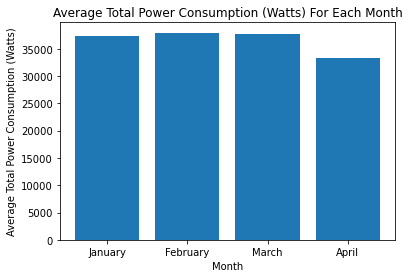

In [17]:
x_data = month_data_building_df["month"]
y_data = month_data_building_df["total power consumption (Watts)"]

plt.title("Average Total Power Consumption (Watts) For Each Month")
plt.xlabel("Month")
plt.ylabel("Average Total Power Consumption (Watts)")
plt.bar(x_data, y_data, tick_label=["January", "February", "March", "April"]); 

#Note: If you are wondering why we are using the tick_label argument, try running the code without it!

Which month has the most energy used? Which has the least energy used? What reasons do you think explain that?

In the cell below, groupby "month" again and this time find the average outdoor temperature and make a bar chart that plots this. 

In [18]:
# EXERCISE - Use groupby

month_data_temp = weather_and_power.groupby("month")["outdoor air temperature (F)"].mean()

month_data_temp

month
1    49.777484
2    46.384168
3    47.442011
4    50.130343
Name: outdoor air temperature (F), dtype: float64

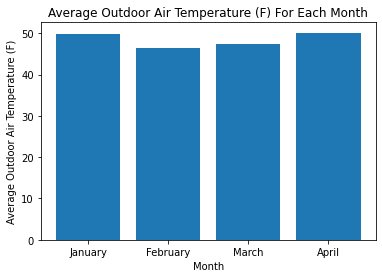

In [19]:
#EXERCISE - Create a bar chart

#Don't forget to use reset_index() first
month_data_temp_df = month_data_temp.reset_index()

#Create your bar plot
x_data = month_data_temp_df["month"]
y_data = month_data_temp_df["outdoor air temperature (F)"]

plt.title("Average Outdoor Air Temperature (F) For Each Month")
plt.xlabel("Month")
plt.ylabel("Average Outdoor Air Temperature (F)")
plt.bar(x_data, y_data, tick_label=["January", "February", "March", "April"]);

Seeing this chart, does it make sense that February and March use the most energy? Why or why not?

Notebook developed by: Rachel McCarty, Kseniya Usovich, Laurel Hales, Alisa Bettale